In [1]:
# %matplotlib inline
import numpy as np
import scipy as sc
import matplotlib as mpl
import matplotlib.pyplot as plt

from utils import *

mpl.rcParams.update(rcParams)

In [2]:
%%bash
cd .. && make clean && make

In [3]:
config_name = 'varying'
conf = load_conf(config_name)

In [4]:
params_unif, data_unif_temp, data_unif_heat = run_with_params(
    config_name,
    [{
        'alpha': 1,
    }]
)[0]
params_nonunif, data_nonunif_temp, data_nonunif_heat = run_with_params(
    config_name,
    [{
        'alpha': 2,
    }]
)[0]

Running simulations... Done 1/1
Running simulations... Done 1/1


In [5]:
params_precise, data_precise, data_precise_heat = run_with_params(
    config_name,
    [{
        'alpha': 2,
        'N': 1000,
    }]
)[0]

Running simulations... Done 1/1


# Plots!

## For n=10

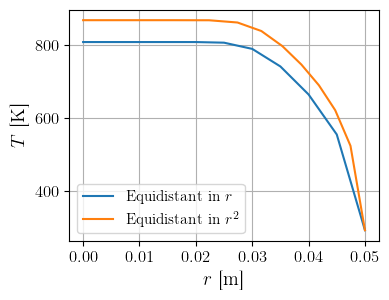

In [6]:
plt.plot(data_unif_temp[:,0], data_unif_temp[:,1], label=r'Equidistant in $r$')
plt.plot(data_nonunif_temp[:,0], data_nonunif_temp[:,1], label=r'Equidistant in $r^2$')
# TODO: solution analytique

plt.xlabel(r'$r$ [m]')
plt.ylabel(r'$T$ [K]')
plt.legend()
plt.grid()

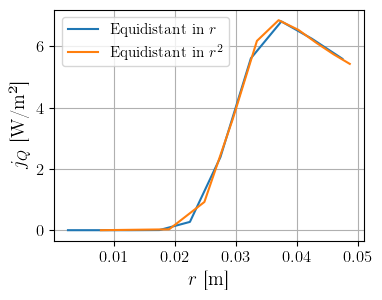

In [7]:
plt.plot(data_unif_heat[:,0], data_unif_heat[:,1], label=r'Equidistant in $r$')
plt.plot(data_nonunif_heat[:,0], data_nonunif_heat[:,1], label=r'Equidistant in $r^2$')
# TODO: solution analytique

plt.xlabel(r'$r$ [m]')
plt.ylabel(r'$j_Q$ [W/m²]')
plt.legend()
plt.grid()

In [8]:
S0 = conf['S0']
r0 = conf['r0']
sigma = conf['sigma']
R = conf['R']

def dPtot(r):
    return 2*np.pi*r * S0*np.exp(-((r-r0)/sigma)**2)

Ptot = sc.integrate.quad(lambda r: dPtot(r), 0, R)[0]

In [9]:
print(data_nonunif_heat[-1,1])
Gamma_unif = 2*np.pi*R * data_unif_heat[-1,1]
Gamma_nonunif = 2*np.pi*R * data_nonunif_heat[-1,1]

print(f'Ptot = {Ptot} \nGamma_unif = {Gamma_unif} \nDiff = {np.abs(Ptot-Gamma_unif)}')
print(f'\nPtot = {Ptot} \nGamma_nonunif = {Gamma_nonunif} \nDiff = {np.abs(Ptot-Gamma_nonunif)}')

5.42866671306343
Ptot = 1.6704983773337683 
Gamma_unif = 1.758233704306347 
Diff = 0.08773532697257869

Ptot = 1.6704983773337683 
Gamma_nonunif = 1.7054659464547521 
Diff = 0.034967569120983866


## For n=1000

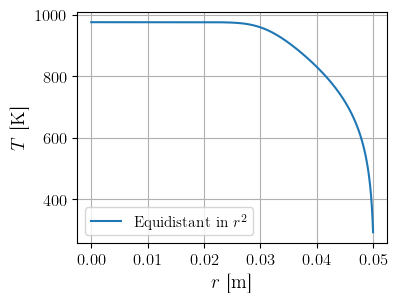

In [10]:
plt.plot(data_precise[:,0], data_precise[:,1], label=r'Equidistant in $r^2$')

plt.xlabel(r'$r$ [m]')
plt.ylabel(r'$T$ [K]')
plt.legend()
plt.grid()

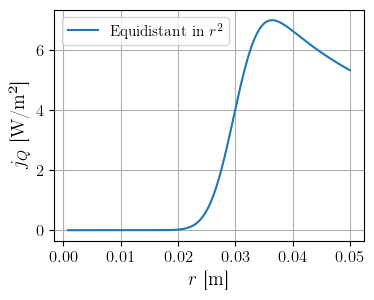

In [11]:
plt.plot(data_precise_heat[:,0], data_precise_heat[:,1], label=r'Equidistant in $r^2$')

plt.xlabel(r'$r$ [m]')
plt.ylabel(r'$j_Q$ [W/m²]')
plt.legend()
plt.grid()

In [12]:
# print(data_precise_heat[-1,1])
Gamma = 2*np.pi*R * data_precise_heat[-1,1]

print(f'Ptot = {Ptot} \nGamma = {Gamma} \nDiff = {np.abs(Ptot-Gamma)}')

Ptot = 1.6704983773337683 
Gamma = 1.670915329410772 
Diff = 0.00041695207700365167
